# COMP1801 Tutorial Week 2 - Supervised learning Introduction (Regression)
*Dr Peter Soar - 2022/23*

This is the second tutorial and will be demonstrating how to use traditional ML methods. For this week we will be primarily focussing on Linear Regression.

For this tutorial, read through and try to understand the text and code examples I have provided (ask your tutor if you have any questions) and this week there will be a selection of exercises. Attempt these exercises on your own, but do ask your tutor for help if you get stuck.



##0. Do not forget to import all the Python Libraries being used!

In [1]:
# Run this cell or a lot of the code in the workbook will not work!
import numpy as np # A useful package for dealing with mathematical processes, it can deal with multi-dimensional arrays such as matrices intuitively.
import pandas as pd #a common package for viewing tabular data
import matplotlib.pyplot as plt #We will be using Matplotlib for our graphs
import sklearn.linear_model, sklearn.datasets # sklearn is an important package for much of the ML we will be doing, this time we are using the Linear Regression Model and the datasets
from sklearn import kernel_ridge # For one exercise I will also be demonstrating Kernal Ridge Regression


# 1. Supervised Learning (prediction, e.g. regression and classification)

## 1.1 Overview
The aim of supervised learning to to make predictionsof target values when whesented with new feature values.
- When presented with a Matrix  ${\boldsymbol{X}_\mathrm{new}}$ of new feature values, we want to output the vector ${\hat{\boldsymbol{y}}_\mathrm{new}}$ of predicted target values.
  - If the targets are *real* values (so continous numbers or `floats`) then you are solving a **regression** problem.
  - If our targets are categorical class labels (represented with a string or integer number) then you are solving a **classification** problem.

- To do this we need to train a model using training data containing existing feature and target values ${\boldsymbol{X}_\mathrm{train}}$ and ${\boldsymbol{y}_\mathrm{train}}$ 
  - Example 1: house price prediction (regression), where each value in $\boldsymbol{X}$ is the income of an customer and the value in the same row in $\boldsymbol{y}$ indicates the customor's house price.
  - Example 2: breast cancer prediction (classification), where each values in $\boldsymbol{X}$ is the area of a tumour and the value in the same row in $\boldsymbol{y}$ indicates its label (benign/malignant).


##1.2 Predictions with Linear Models in Python



1.   Define the model you want to use (example linear regression: `obj = sklearn.linear_model.LinearRegression()`)
2.   Fit your model using the training data using `obj.fit(X_train, y_train)` (we will explain the importance of data splitting in a later lecture, for now just understand that we need to split our data into two parts - testing data and training data).
  *   Inputs: 
      * ${\boldsymbol{X}_\mathrm{train}}$ (`X_train`): the feature matrix (a 2D `np.array` where `X_train.shape == (m_train, n)`) that contains the features of the training data.
      * ${\boldsymbol{y}_\mathrm{train}}$ (`y_train`): the target vector (a 1D or 2D `np.array` where `y_train.shape == (m_train, p)`) that contains the target values of the training data.
      * `m_train`: Number of rows of training data
      * `n`: Number of features
      * `p`: dimension of the target. $p=1$ for all examples in this workbook.
  *   Outputs: ${\boldsymbol{\theta}}$ - the hypothesis function parameter(s) which describes our linear model.
3. Predict the target values `y_pred = obj.predict(X_train)`
  *   Mathematically: $\hat{\boldsymbol{Y}}_\mathrm{new} = \boldsymbol{h_{\theta}}(\boldsymbol{X}_\mathrm{new})$
  * Inputs: 
      * ${\boldsymbol{X}_\mathrm{new}}$ (`X_new`): the feature matrix (a 2D `np.array` where `X_new.shape == (m_new, n)`) that contains the features of the new data.
      * `m_new`: Number of rows of new data
      * `n`: Number of features
      * Note: The $i$-th row $\boldsymbol{x}_\mathrm{new}^{(i) \top}$ (`X_new[i, :]`) of the feature matrix ${\boldsymbol{X}_\mathrm{new}}$ can be defined as a feature vector (1D `np.array` row vector) for the $i$-th new data point ($i = 0, 1, \dots, m_\mathrm{new}-1$), allowing $ \boldsymbol{X}_\mathrm{new}$ to be defined in the following vector form:

  $$
  \boldsymbol{X}_\mathrm{new}
  = \begin{bmatrix}
  \boldsymbol{x}_\mathrm{new}^{(0)} \\
  \boldsymbol{x}_\mathrm{new}^{(1)} \\
  \vdots \\
  \boldsymbol{x}_\mathrm{new}^{(m_\mathrm{new} - 1)} \\
  \end{bmatrix}.
  $$   
  * Implicit inputs (stored in the model): ${\boldsymbol{\theta}}$ - the hypothesis function parameter(s) which describes our linear model.
 * Outputs:
      * ${\hat{\boldsymbol{y}}_\mathrm{new}}$ (`y_pred` for one-dimensional target cases or `Y_pred` for multi-dimensional target cases): the target vector (a 1D or 2D `np.array` where `y_train.shape == (m_new, p)`) that contains the target values of the training data.
      * `p`: dimension of the target. $p=1$ for all examples in this workbook.
      * Note: The $i$-th row $\hat{\boldsymbol{y}}_\mathrm{new}^{(i) \top}$ (`y_pred[i]` or `Y_pred[i, :]`) of the prediction vector ${\hat{\boldsymbol{y}}_\mathrm{new}}$ 
     (`int` or 1D `np.ndarray`) can be defined as the target vector of the $i$-th new data point ($i = 0, 1, \dots, m_\mathrm{new}-1$), given by $\hat{\boldsymbol{y}}_\mathrm{new}^{(i)} = h_\boldsymbol{\theta} (\boldsymbol{x}_\mathrm{new}^{(i)})$, , allowing $ \hat{\boldsymbol{y}}_\mathrm{new}$ to be defined in the following vector form:

$$
      \hat{\boldsymbol{y}}_\mathrm{new}
      = \begin{bmatrix}
      \hat{\boldsymbol{y}}_\mathrm{new}^{(0)} \\
      \hat{\boldsymbol{y}}_\mathrm{new}^{(1)} \\
      \vdots \\
      \hat{\boldsymbol{y}}_\mathrm{new}^{(m_\mathrm{new} - 1)} \\
      \end{bmatrix}
      = \begin{bmatrix}
      h_\boldsymbol{\theta} (\boldsymbol{x}_\mathrm{new}^{(0)}) \\
      h_\boldsymbol{\theta} (\boldsymbol{x}_\mathrm{new}^{(1)}) \\
      \vdots \\
      h_\boldsymbol{\theta} (\boldsymbol{x}_\mathrm{new}^{(m_\mathrm{new} - 1)}) \\
      \end{bmatrix}.
$$

##1.3 Linear Regression
In this tutorial we are primarily going to be looking at fitting linear regression models to our data, where for our training data we fit a model that is based on linear relationships between our feature(s) and our target.

We can define this Mathematically as:
*   For our data we have the relationship: $ \boldsymbol{y} = \boldsymbol{X}\boldsymbol{\theta} + e$ where $e$ is some error (assumed to be normally distributed)
*   We will fit a model: $\boldsymbol{h_{\theta}}(\boldsymbol{X}_\mathrm{new}) = \hat{\boldsymbol{y}}_\mathrm{new}$ which minimises the error between our observed and predicted values of $\boldsymbol{y}$
*   Or in Matrix form:

$$
\begin{bmatrix}
\boldsymbol{x}_\mathrm{new}^{(0,0)}  & \boldsymbol{x}_\mathrm{new}^{(0,1)}  & \dots  & \boldsymbol{x}_\mathrm{new}^{(0,n)}\\
\boldsymbol{x}_\mathrm{new}^{(1,0)}  & \boldsymbol{x}_\mathrm{new}^{(1,1)}  & \dots  & \boldsymbol{x}_\mathrm{new}^{(1,n)}\\
\vdots & \vdots & \ddots & \vdots \\
\boldsymbol{x}_\mathrm{new}^{(m_\mathrm{new} - 1, 0)} & \boldsymbol{x}_\mathrm{new}^{(m_\mathrm{new} - 1, 1)} & \dots  & \boldsymbol{x}_\mathrm{new}^{(m_\mathrm{new} - 1, n)}\\
\end{bmatrix}
\begin{bmatrix}
\theta_{1} \\
\theta_{2} \\
\vdots \\
\theta_{n}\\
\end{bmatrix} = \begin{bmatrix}
      \hat{\boldsymbol{y}}_\mathrm{new}^{(0)} \\
      \hat{\boldsymbol{y}}_\mathrm{new}^{(1)} \\
      \vdots \\
      \hat{\boldsymbol{y}}_\mathrm{new}^{(m_\mathrm{new} - 1)} \\
      \end{bmatrix}.
$$   
*   We can also write the model in terms of our feature(s) and parameters more explicitely for each predicted target value:
  *   Generic multivariable equation: $\hat{\boldsymbol{y}}_\mathrm{new}^{(i)} =\theta_{0}+\theta_{1}x_1^{(i)} + \dots + \theta_{n}x_n^{(i)} $
  *   Univariate equation with intercept (constant): $\hat{\boldsymbol{y}}_\mathrm{new}^{(i)} =\theta_{0}+\theta_{1}x_1^{(i)}$
  *   Univariate equation with no intercept (for centred data): $\hat{\boldsymbol{y}}_\mathrm{new}^{(i)} =\theta_{1}x_1^{(i)}$
  *   Note: You can define if you want to include your intercept by using the  `fit_intercept` parameter when defining your model - `sklearn.linear_model.LinearRegression(fit_intercept=True)`. `True` is the default value, if set to `False` then $\theta_{0}$ is fixed as zero.
* The Linear Regression model we are fitting in sklearn uses the 'least squares error' to obtain optimal values for $\boldsymbol{\theta}$
  * Calculating this least squares error allows the model parameters to be obtained directly by the following equation:
  $$\boldsymbol{\theta} = (\boldsymbol{X_{train}}^T\boldsymbol{X_{train}})^{-1} \boldsymbol{X_{train}}^T\boldsymbol{y_{train}}
  $$
  * I won't do it here, but there are many proofs of how to obtain this equation online.
* To judge how well our models are performing, we will be using two metrics this week
  * Mean Squared Error
    * $\frac{1}{n}\sum^{n}_{i=1}(y_i -\hat{y_i})^2$
    * Aim is to minimise this value
    * This value must $0$ (for a perfect model) or positive, due to any errors being squared.
    * We will be using the MSE as our loss function in later lectures.
  * $R^2$ Score
    * Explains how closely our predictions match the real data
    * Generally in the range $0 \leq R^2 \leq 1$, where $1$ is a perfect fit. However, it can go below 0 if your model fits worse than a horizontal line.

  * Note: the mean square error is affected by the scale of the target values, while R2 score is normalized by the variance of the target values.


# 2. Fitting a univariate Linear Regression Model on synthetic data.

For our first example, I want to show you a very simple case where we are fitting a univariate linear regression line to just a few lines of data.
The data have a relationship of $y=x$ with some added noise.
Because we are fitting the intercept on this model, the Model we are technically fitting is:

$$
\begin{bmatrix}
1 & 1 \\
1 & 2 \\
1 & 3 \\
1 & 4 \\
1 & 5 \\
1 & 6 \\
1 & 7 \\
1 & 8 \\
1 & 9 \\
1 & 10 \\
\end{bmatrix}
\begin{bmatrix}
\theta_{0} \\
\theta_{1} \\
\end{bmatrix} = \begin{bmatrix}
2.259000208 \\
2.089513864 \\
2.691697786 \\
4.335616639 \\
5.990895127 \\
5.715164414 \\
6.785837863 \\
7.833729282 \\
9.136204457 \\
8.322833045 \\
      \end{bmatrix} + \boldsymbol{e}.
$$   


theta_0: [0.95983526]
theta_1: [[0.82840255]]


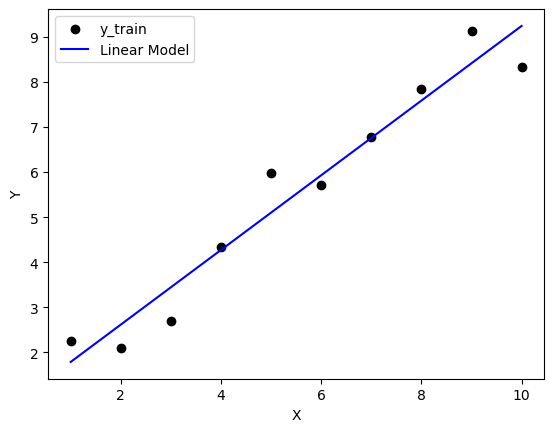

Mean squared error loss: 0.3337
R2 score: 0.9443


In [2]:
# Create our arrays of training data
# Note, because we are using `intercept_fit=True` (the default) in our linear model, we do not have to include the column of 1's
# The model implicitely know we want to calculate theta_0
X_train = np.array([[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]])
y_train = np.array([[2.259000208],[2.089513864],[2.691697786],[4.335616639],[5.990895127],[5.715164414],[6.785837863],[7.833729282],[9.136204457],[8.322833045]])

# Create linear regression object
obj = sklearn.linear_model.LinearRegression()

# Train the model using the training sets
obj.fit(X_train, y_train)

# Can obtain out model coefficients from the model obj we have trained
print('theta_0:',obj.intercept_)
print('theta_1:',obj.coef_)

# Plot our results
plt.scatter(X_train, y_train,  color='black', label='y_train')
plt.plot(X_train, obj.predict(X_train), color='blue', label='Linear Model')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Look at our evaluation metrics - how well have we fit the data?
# Note: Usually we will be computing these on predictions based on our test data, but for this case we are testing how well our model fits the data we have.
# The mean squared error loss
print('Mean squared error loss: {:.4f}'.format(sklearn.metrics.mean_squared_error(y_train, obj.predict(X_train))))
# The R2 score: 1 is perfect prediction
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_train, obj.predict(X_train))))

##2.1 **Exercise 1**

Try fitting another univariate Linear Regression Model to the following data:
$$
\begin{bmatrix}
1 & 1 \\
1 & 2 \\
1 & 3 \\
1 & 4 \\
1 & 5 \\
1 & 6 \\
1 & 7 \\
1 & 8 \\
1 & 9 \\
1 & 10 \\
\end{bmatrix}
\begin{bmatrix}
\theta_{0} \\
\theta_{1} \\
\end{bmatrix} = \begin{bmatrix}
4.389592281 \\
5.38190902 \\
6.043030047 \\
5.344140261 \\
10.74627973 \\
12.65013556 \\
15.69762882 \\
16.04443143 \\
16.55969237 \\
20.49457587 \\
      \end{bmatrix} + \textbf{e}.
$$   

How do these parameters compare to our first model and what does that say about the relationship between $X$ and $y$ in this case?

theta_0: [1.12978607]
theta_1: [[1.85551918]]


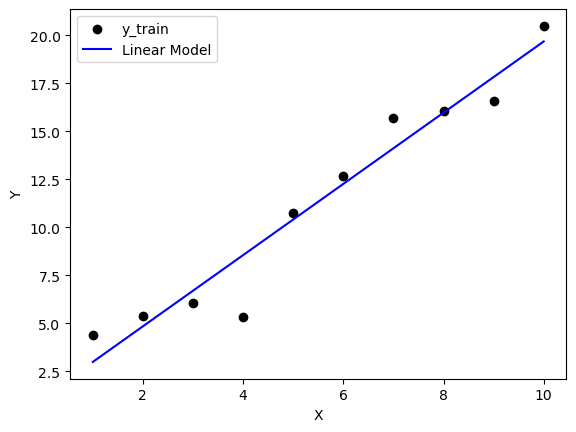

Mean squared error loss: 1.8013
R2 score: 0.9404


In [3]:
##############################################################
# YOur code here
##############################################################
X_train = np.array([[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]])
y_train = np.array([[4.389592281],[5.38190902],[6.043030047],[5.344140261],[10.74627973],[12.65013556],[15.69762882],[16.04443143],[16.55969237],[20.49457587]])

# Create linear regression object
model = sklearn.linear_model.LinearRegression()

# Train the model using the training sets
model.fit(X_train, y_train)

# Can obtain out model coefficients from the model obj we have trained
print('theta_0:',model.intercept_)
print('theta_1:',model.coef_)

# Plot our results
plt.scatter(X_train, y_train,  color='black', label='y_train')
plt.plot(X_train, model.predict(X_train), color='blue', label='Linear Model')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Look at our evaluation metrics - how well have we fit the data?
# The mean squared error loss
print('Mean squared error loss: {:.4f}'.format(sklearn.metrics.mean_squared_error(y_train, model.predict(X_train))))
# The R2 score: 1 is perfect prediction
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_train, model.predict(X_train))))

In [4]:
np.c_[X_train, y_train]

array([[ 1.        ,  4.38959228],
       [ 2.        ,  5.38190902],
       [ 3.        ,  6.04303005],
       [ 4.        ,  5.34414026],
       [ 5.        , 10.74627973],
       [ 6.        , 12.65013556],
       [ 7.        , 15.69762882],
       [ 8.        , 16.04443143],
       [ 9.        , 16.55969237],
       [10.        , 20.49457587]])

#3. Loss functions

For least squares lienar regression we are able to obtain esimates for $\theta$ directly when fitting our model. However, as we will be exploring in more detail next week, that is not always a viable option for some models. In these cases we we will update $\theta$ starting with an initial guess and updating it until we find the values which minimse the loss function being used. For this we use optimization algorithms, as I will cover next week, but I just want to make some quick demonstrations here to make sure you keep the loss function in mind as we continue on.

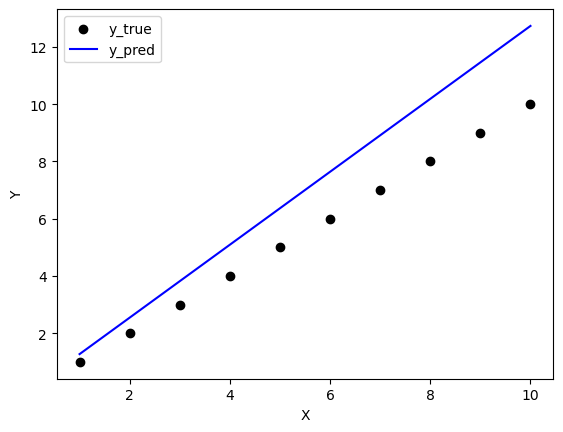

Hypothesis:  [[1.27302995]]
Loss:  2.869996213512213


In [5]:
# Define a perfect y=x equation
X = np.array([[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]])
y_true = np.array([[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]])

# Generate a random value between +-5
thetas = (np.random.rand(1,1)-0.5)*10

# Predict our y values with this hypothesis: y_pred= X*theta
y_pred = X.dot(thetas)

# Plot outputs to see how well we fit the real data
plt.scatter(X, y_true,  color='black', label='y_true')
plt.plot(X, y_pred, color='blue', label='y_pred')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

print('Hypothesis: ', thetas) # show our guessed hypothesis
print('Loss: ', sklearn.metrics.mean_squared_error(y_true, y_pred)) # Mean Squared error we want minimised.

# Try running this cell multiple time to see how the predicted model and loss function change as we make differnt guesses for theta.

After running this for a few times it should be quite obvious that the hypothesis that minimises MSE is $\theta=1$, but it certainly isn't practical to sit here making random guesses one at a time for more complicated models.
Below I've shown how the loss function minimising hypothesis is clearly 1 by taking many random samples at once. Try experimenting with the number of samples and see how much clearer it becomes as the samples increase and how unclear it is with only a handfull of samples.

Text(0.5, 1.0, 'Theta vs Loss')

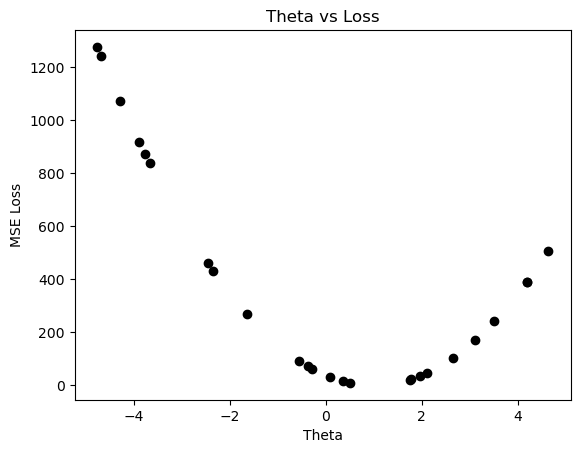

In [6]:
# Define your model vectors again
X = np.array([[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]])
y_true = np.array([[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]])

# Decide how many random guesses you want to take
# Try a small number such as 5 and compare with a larger number like 100
samples = 25

ind = np.arange(0,samples) # create an index vector for our loop
thetas = (np.random.rand(1,samples)-0.5)*10 # generate a vector of random guesses for theta
cost = np.zeros(samples) # create anempty vector to store out loss function results in
y_pred = X.dot(thetas) # Predict our y values for all our guesses of theta at once

# Loop through our random guesses and work out the corresponding cost function.
for i in ind:
  cost[i]=sklearn.metrics.mean_squared_error(y_true, y_pred[:,i])


# Plot the output
# See how the theta that minimises the MSE is clearly 1 
plt.scatter(thetas, cost,  color='black')
plt.xlabel('Theta')
plt.ylabel('MSE Loss')
plt.title('Theta vs Loss')

# 4. Fit Linear Regression on Real Data

Now we have been through quite  bit of theory, I want to give you some examples and exercises where you are fitting linear models to some real data.

##4.1 Linear Regression with one Variable

For this first examples we are going to use the California housing data I got you to load last week, we will be using the version hosted on sklearn again.

###Load the data


The first step is loading our data into Colab, hopefully this will all be familliar from last week:

In [25]:
# Load the house price dataset
house = sklearn.datasets.fetch_california_housing()
raw_df = pd.DataFrame(data= np.c_[house['data'], house['target']],
                     columns= house['feature_names'] + ['target'])
# Shuffle dataset for a random sample, as we will not be using the entire dataset
rng = np.random.default_rng(0) # This sets the random seed, meaning that we will get the SAME random sample if we rerun this cell.
df = raw_df.iloc[rng.permutation(len(raw_df))].reset_index(drop=True) # Shuffle data

# show the Full data
display(df)

# Use only one feature to start with for univariate linear regression - The Median Income
Xy_df = df[['MedInc', 'target']]
# show the data
display(Xy_df)
Xy_df.head()
# So for this task we are going to be predicting the property value based on the Median Income

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,3.3687,45.0,5.594175,0.998058,1470.0,2.854369,34.00,-117.38,1.23800
1,2.1660,18.0,4.802059,1.151030,2203.0,2.520595,37.68,-120.98,1.18600
2,1.5642,15.0,4.403292,1.053498,1070.0,4.403292,36.62,-119.32,0.51500
3,3.6885,49.0,5.184569,1.052950,2363.0,3.574887,37.72,-122.43,2.54000
4,9.7449,20.0,7.095963,1.070152,3731.0,2.469226,34.12,-118.45,5.00001
...,...,...,...,...,...,...,...,...,...
20635,3.0208,38.0,5.605664,1.054466,1568.0,3.416122,34.00,-118.11,1.93700
20636,9.9071,30.0,8.241379,1.037618,956.0,2.996865,33.90,-117.93,5.00001
20637,4.7105,3.0,3.769314,1.282916,1441.0,1.568009,37.78,-122.39,2.75000
20638,4.4375,52.0,5.436364,1.130909,506.0,1.840000,37.76,-122.40,3.20000


,MedInc,target
0,3.3687,1.23800
1,2.1660,1.18600
2,1.5642,0.51500
3,3.6885,2.54000
4,9.7449,5.00001
...,...,...
20635,3.0208,1.93700
20636,9.9071,5.00001
20637,4.7105,2.75000
20638,4.4375,3.20000


,MedInc,target
0,3.3687,1.23800
1,2.1660,1.18600
2,1.5642,0.51500
3,3.6885,2.54000
4,9.7449,5.00001


In [8]:
raw = pd.DataFrame(data=np.c_[house["data"], house["target"]], columns=house.feature_names + ["traget"])
raw

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,traget
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### Convert the data to NumPy ndarrays and split

Next we need to convert the data into `np.array`'s so we can use them with our model and split the data. Note: Data splitting will be explained in the a later lecture as it is necessary for a fair evaluation. For now just know we need to split our data into (at least) two groups when fitting models.

In [9]:
# prepare NumPy ndarrays
X = np.array(Xy_df[['MedInc']])
y = np.array(Xy_df['target'])

# Define how much test and training data we want. You can try changing these later to see how it changes the model and predictions
n_train_points = 200 # This is the data that will be used to train our model. As a rule of thumb this should be in the region of 70-80% of the total data being used, but there may be good reasons for using more or less 
n_new_points = 50 # This is the data that will be used to test the accuracy of our model. As a rule of thumb this should be in the region of 20-30% of the total data being used, but there may be good reasons for using more or less 

# Split the feature data into training/new data
X_train = X[:n_train_points] # This will select the data points from 0 to the number defined in n_train_points (200 in this case)
X_new = X[n_train_points:n_train_points+n_new_points] # this will select the date from 200 to 250 in this case (n_train_points to n_train_points+n_new_points)

# Split the target data into training/new data
y_train = y[:n_train_points]
y_true = y[n_train_points:n_train_points+n_new_points]

###Fit and Predict

Now we can actually fit our model to our training data, the same way as with out synthetic data used n teh examples above.

In [10]:
# Create linear regression object
obj = sklearn.linear_model.LinearRegression(fit_intercept=True)

# Train the model using the training sets
obj.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = obj.predict(X_new)

# Can obtain out model coefficients from the model obj we have trained
print('theta_0:',obj.intercept_)
print('theta_1:',obj.coef_)


theta_0: 0.19726970655236964
theta_1: [0.47134567]


###Plot the outputs

Then, if possible it's always nice to have a visual representation of how well our predictions are fitting the data.
This allows us to gain a qualititative feel for how well our model is fitting the data - we can see that there is a positive correlation between the median income and house price which our model is accounting for, but there does seem to be a lot of variation our model is failing to pick up.

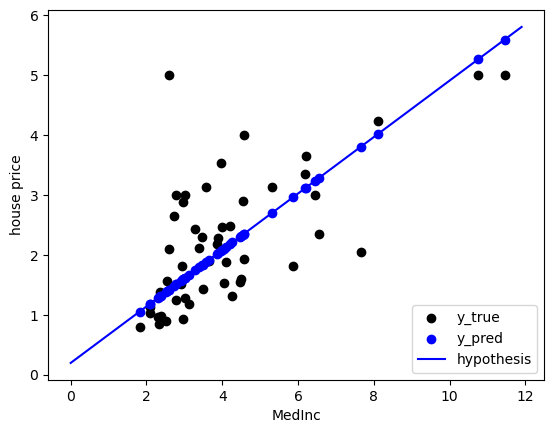

In [11]:
# Plot outputs
plt.scatter(X_new, y_true,  color='black', label='y_true') # Observed y values
plt.scatter(X_new, y_pred, color='blue', label='y_pred') # predicted y values
plt.plot(np.r_[0:12:0.1], obj.predict(np.r_[0:12:0.1][:, np.newaxis]), color='blue', label='hypothesis') # Regression line
plt.xlabel('MedInc')
plt.ylabel('house price')
plt.legend()
plt.show()

### Loss and score functions
It's then always worth checking the loss and score functions to give us a quantative measure of how well our model is fitting the data.
- Loss: the lower, the better.
- Score: the higher, the better.

In this case, though the MSE seems small this is just due to the MSE values being relative to the size of the target values (so if our target was in the rang of 0-0.1 it would be even smaller and if it was in the range of 0-100 it would be much larger). The MSE is most useful when comparing different models, as you will be looking for the model with teh samllest MSE, whatever that value may be.

However, looking at the score function we can see that our model is only accounting for around $36\%$ of the variation in the data.

In [12]:
# The mean squared error loss
print('Mean squared error loss: {:.4f}'.format(sklearn.metrics.mean_squared_error(y_true, y_pred)))
# The R2 score: 1 is perfect prediction
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_true, y_pred)))


Mean squared error loss: 0.7799
R2 score: 0.3625


##4.2 **Exercise 2** fitting linear Regression on Real Data

Try fitting a univariate linear regression model to the Diabetes dataset included in *sklearn*. This is a toy datset, so you can access it using `sklearn.datasets.load_diabetes()`. Use the `bmi` column as your feature for predicting the `target` (the patients diabetes level). How well does your model fit the data? Do any of the other features provide a better fit?



,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,-0.001882,0.05068,0.030440,0.052858,0.039710,0.056619,-0.039719,0.071210,0.025393,0.027917,222.0
1,0.012648,0.05068,0.000261,-0.011409,0.039710,0.057245,-0.039719,0.056081,0.024053,0.032059,259.0
2,-0.016412,0.05068,0.127443,0.097616,0.016318,0.017475,-0.021311,0.034309,0.034864,0.003064,308.0
3,-0.103593,0.05068,-0.023451,-0.022885,-0.086878,-0.067701,-0.017629,-0.039493,-0.078141,-0.071494,71.0
4,0.085299,0.05068,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0


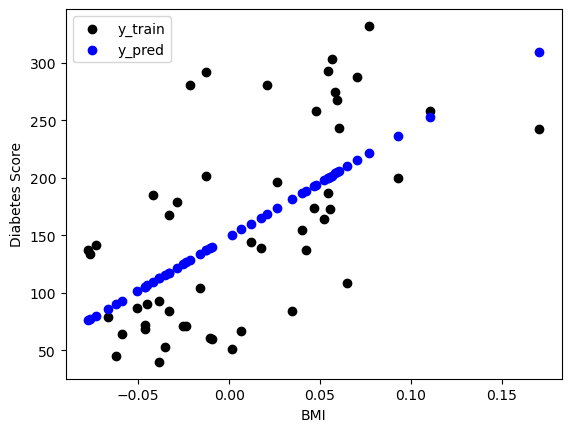

Mean squared error loss: 4484.5869
R2 score: 0.3717


In [46]:
##############################################################
# Your code here
##############################################################

diab = sklearn.datasets.load_diabetes()
raw_df = pd.DataFrame(data= np.c_[diab['data'], diab['target']],
                     columns= diab['feature_names'] + ['target'])
# Shuffle dataset
rng = np.random.default_rng(0)
df = raw_df.iloc[rng.permutation(len(raw_df))].reset_index(drop=True)


# show the data
display(df.head())

# prepare NumPy ndarrays
X = np.array(df[['bmi']])
y = np.array(df['target'])

n_train_points = 150
n_new_points = 50

# Split the data into training/new data
X_train = X[:n_train_points]
X_new = X[n_train_points:n_train_points+n_new_points]

# Split the targets into training/new data
y_train = y[:n_train_points]
y_true = y[n_train_points:n_train_points+n_new_points]

# Create linear regression object
obj = sklearn.linear_model.LinearRegression()

# Train the model using the training sets
obj.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = obj.predict(X_new)

plt.scatter(X_new, y_true,  color='black', label='y_train')
plt.scatter(X_new, y_pred, color='blue', label='y_pred')


plt.xlabel('BMI')
plt.ylabel('Diabetes Score')
plt.legend()
plt.show()

# The mean squared error loss
print('Mean squared error loss: {:.4f}'.format(sklearn.metrics.mean_squared_error(y_true, y_pred)))
# The R2 score: 1 is perfect prediction
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_true, y_pred)))

In [55]:
pd.DataFrame(data=np.c_[diab["data"], diab["target"]], columns=diab["feature_names"]+["target"]).head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


##4.3 **Exercise 3:** Fit a Linear Regression model without using the sklearn function

As I mentioned in the theory section above, we can obtain the model hypothesis coefficients directly using the following equation:
  $$\boldsymbol{\theta} = (\boldsymbol{X_{train}}^T\boldsymbol{X_{train}})^{-1} \boldsymbol{X_{train}}^T\boldsymbol{y_{train}}
  $$
Are you able to use this information to fit a model to the califoria housing dataset without using the sklearn Linear model, `obj.fit(X_train, y_train)`  and prediction functions? If done correctly you should obtain the same results as in **section 4.1**.

Hints
- The matrix inverse function such that $XX^{-1}=I$ can be performed directly in python. $X^{-1}$ would be found using `np.linalg.inv(X)`
- Don't forget that we are fitting the intercept in 4.1, which means we will have to work out $\theta_0$. Consider the example in **section 2** for more hints.

Fitted Hypothesis: [0.47134567 0.19726971]


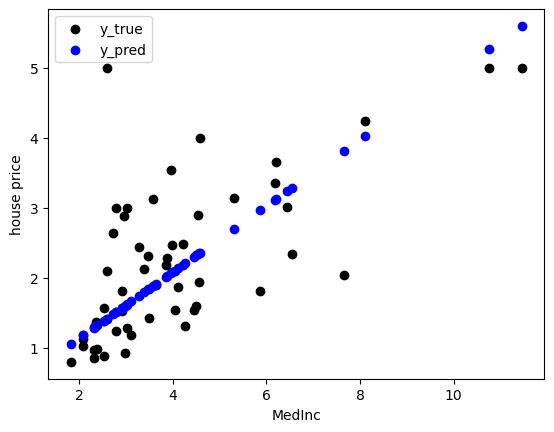

Mean squared error loss: 0.7799
R2 score: 0.3625


In [14]:
##############################################################
# Your code here
##############################################################
# Load the house price dataset
house = sklearn.datasets.fetch_california_housing()
raw_df = pd.DataFrame(data= np.c_[house['data'], house['target']],
                     columns= house['feature_names'] + ['target'])
# Shuffle dataset
rng = np.random.default_rng(0)
df = raw_df.iloc[rng.permutation(len(raw_df))].reset_index(drop=True)
df['const'] = 1 # We need to add a dummy column of ones so that we obtain an intercept value for theta_0

X = np.array(df[['MedInc','const']])
y = np.array(df['target'])

n_train_points = 200
n_new_points = 50

# Split the data into training/new data
X_train = X[:n_train_points]
X_new = X[n_train_points:n_train_points+n_new_points]
X_new_f1 = X_new[:,0] # Seperating the MedInc for visualisation purposes

# Split the targets into training/new data
y_train = y[:n_train_points]
y_true = y[n_train_points:n_train_points+n_new_points]

#Linear Regression
theta= np.linalg.inv((X_train.T).dot(X_train)).dot((X_train.T)).dot(y_train)

print('Fitted Hypothesis:',theta)

y_pred = X_new.dot(theta) # Multiply our features with theta to get our predictions

# Plot outputs
plt.scatter(X_new_f1, y_true,  color='black', label='y_true')
plt.scatter(X_new_f1, y_pred, color='blue', label='y_pred')
plt.xlabel('MedInc')
plt.ylabel('house price')
plt.legend()
plt.show()

# The mean squared error loss
print('Mean squared error loss: {:.4f}'.format(sklearn.metrics.mean_squared_error(y_true, y_pred)))
# The R2 score: 1 is perfect prediction
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_true, y_pred)))

##4.4 **Exercise 4**: Other Linear Models

There are other linear models you can fit directly in sklearn. I won't go into the mathemtaical details for now, but try fitting a *Kernal Ridge* regression model. we imported this in the top cell of the workbook using `from sklearn import kernel_ridge` and we can make this model in a similar way as our linear regression model using `obj = kernel_ridge.KernelRidge(kernel='rbf')`. Here we are using a `rbf` kernal, but there are many other kernal types you can experiment with, such as: `linear`, `laplacian`, `polynomial`, `exponential`, `chi2` and `sigmoid`.

Fit a univariate kernal ridge model to the california housing data (median Income vs House prices) and see how it compares with your linear regression model. Try increasing the size of the samples and see how the prediction changes.

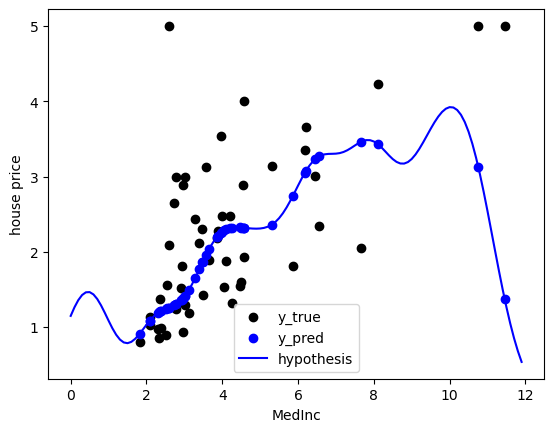

Mean squared error loss: 1.1562
R2 score: 0.0549


In [15]:
##############################################################
# Your code here
##############################################################
# Load the house price dataset
house = sklearn.datasets.fetch_california_housing()
raw_df = pd.DataFrame(data= np.c_[house['data'], house['target']],
                     columns= house['feature_names'] + ['target'])
# Shuffle dataset
rng = np.random.default_rng(0)
df = raw_df.iloc[rng.permutation(len(raw_df))].reset_index(drop=True)

X = np.array(df[['MedInc']])
y = np.array(df['target'])

n_train_points = 200
n_new_points = 50

# Split the data into training/new data
X_train = X[:n_train_points]
X_new = X[n_train_points:n_train_points+n_new_points]

# Split the targets into training/new data
y_train = y[:n_train_points]
y_true = y[n_train_points:n_train_points+n_new_points]

# Create linear regression object
obj = kernel_ridge.KernelRidge(kernel='rbf')

# Train the model using the training sets
obj.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = obj.predict(X_new)

# Plot outputs
plt.scatter(X_new, y_true,  color='black', label='y_true')
plt.scatter(X_new, y_pred, color='blue', label='y_pred')
plt.plot(np.r_[0:12:0.1], obj.predict(np.r_[0:12:0.1][:, np.newaxis]), color='blue', label='hypothesis')
plt.xlabel('MedInc')
plt.ylabel('house price')
plt.legend()
plt.show()

# The mean squared error loss
print('Mean squared error loss: {:.4f}'.format(sklearn.metrics.mean_squared_error(y_true, y_pred)))
# The R2 score: 1 is perfect prediction
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_true, y_pred)))


In [16]:
X_new.shape

(50, 1)

##4.5 **Exercise 5:** Regression model with multiple features

So far we have only been dealing with univariate linear regression because it makes everything more conceptually easy to show and explain. However, in reality we are usually going to have much more data than one feature, and it would be a waste not to use that data in our predictions.
Work out how to expand the univariate model you fitted on the diabetes data in **Exercise 2** so that you fit a multivariate model which uses ALL the features in $X$ to predict $\hat{y}$. How does this compare in accuracy to your univariate model? Experiment with the features being used - do all of them contribute towards the models accuracy, and are some more impactful than others?

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,-0.001882,0.05068,0.030440,0.052858,0.039710,0.056619,-0.039719,0.071210,0.025393,0.027917,222.0
1,0.012648,0.05068,0.000261,-0.011409,0.039710,0.057245,-0.039719,0.056081,0.024053,0.032059,259.0
2,-0.016412,0.05068,0.127443,0.097616,0.016318,0.017475,-0.021311,0.034309,0.034864,0.003064,308.0
3,-0.103593,0.05068,-0.023451,-0.022885,-0.086878,-0.067701,-0.017629,-0.039493,-0.078141,-0.071494,71.0
4,0.085299,0.05068,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0


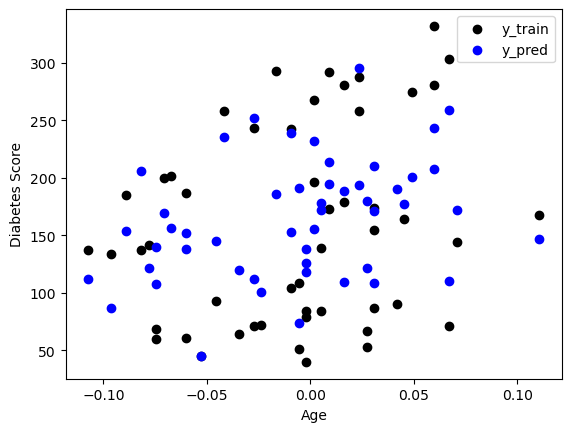

Mean squared error loss: 3566.6946
R2 score: 0.5003


In [56]:
##############################################################
# Your code here
##############################################################

# Load the house price dataset
diab = sklearn.datasets.load_diabetes()
raw_df = pd.DataFrame(data= np.c_[diab['data'], diab['target']],
                     columns= diab['feature_names'] + ['target'])
# Shuffle dataset
rng = np.random.default_rng(0)
df = raw_df.iloc[rng.permutation(len(raw_df))].reset_index(drop=True)

# show the data
display(df.head())

# prepare NumPy ndarrays
col = ['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6'] # defined a new variable for the column names to make it easier to experiment with adding or removing columns
X = np.array(df[col])
y = np.array(df['target'])

n_train_points = 150
n_new_points = 50

# Split the data into training/new data
X_train = X[:n_train_points]
X_new = X[n_train_points:n_train_points+n_new_points]
X_new_disp = X_new[:,0]

# Split the targets into training/new data
y_train = y[:n_train_points]
y_true = y[n_train_points:n_train_points+n_new_points]

# Note, we don't actually have to do anything else with the model functions
# They are prefectly happy with multivariable linear regression
# Create linear regression object
obj = sklearn.linear_model.LinearRegression()
# Train the model using the training sets
obj.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = obj.predict(X_new)

# Plot the Age vs Diabetes
plt.scatter(X_new_disp, y_true,  color='black', label='y_train')
plt.scatter(X_new_disp, y_pred, color='blue', label='y_pred')
plt.xlabel('Age')
plt.ylabel('Diabetes Score')
plt.legend()
plt.show()

# The mean squared error loss
print('Mean squared error loss: {:.4f}'.format(sklearn.metrics.mean_squared_error(y_true, y_pred)))
# The R2 score: 1 is perfect prediction
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_true, y_pred)))

##4.6 **Exercise 6:** Multivariable regression without SKlearn
Try and expand the model you created in **Exercise 3** to work with multiple features. Fit this on the California housing dataset using all avaiable features and compare with your results for univariate regression. 

Extra: Try fitting a multivariable model using sklearn to check you are both obtaining the same answer.

Extra: Experiment with the features to see if all contribute towards the accuracy of the prediction.

Extra: Experiment with changing the number of test/train samples used to see how this changes the accuracy.

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,const
0,3.3687,45.0,5.594175,0.998058,1470.0,2.854369,34.00,-117.38,1.23800,1
1,2.1660,18.0,4.802059,1.151030,2203.0,2.520595,37.68,-120.98,1.18600,1
2,1.5642,15.0,4.403292,1.053498,1070.0,4.403292,36.62,-119.32,0.51500,1
3,3.6885,49.0,5.184569,1.052950,2363.0,3.574887,37.72,-122.43,2.54000,1
4,9.7449,20.0,7.095963,1.070152,3731.0,2.469226,34.12,-118.45,5.00001,1
...,...,...,...,...,...,...,...,...,...,...
20635,3.0208,38.0,5.605664,1.054466,1568.0,3.416122,34.00,-118.11,1.93700,1
20636,9.9071,30.0,8.241379,1.037618,956.0,2.996865,33.90,-117.93,5.00001,1
20637,4.7105,3.0,3.769314,1.282916,1441.0,1.568009,37.78,-122.39,2.75000,1
20638,4.4375,52.0,5.436364,1.130909,506.0,1.840000,37.76,-122.40,3.20000,1


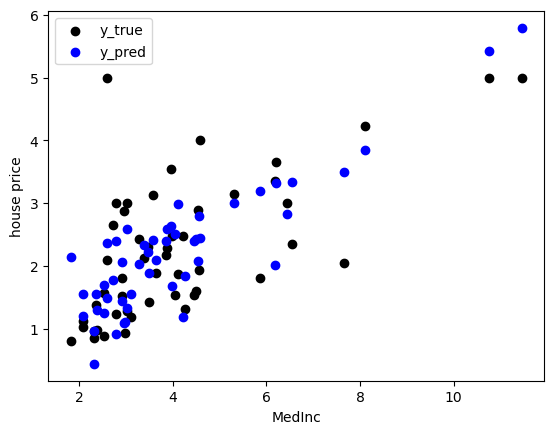

Mean squared error loss: 0.6964
R2 score: 0.4307


In [18]:
##############################################################
# Your code here
##############################################################

# Load the house price dataset
house = sklearn.datasets.fetch_california_housing()
raw_df = pd.DataFrame(data= np.c_[house['data'], house['target']],
                     columns= house['feature_names'] + ['target'])
# Shuffle dataset
rng = np.random.default_rng(0)
df = raw_df.iloc[rng.permutation(len(raw_df))].reset_index(drop=True)

df['const'] = 1 # We need to add a dummy column of ones so that we obtain an intercept value for theta_0
# show the data
display(df)

# prepare NumPy ndarrays
col = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'const']
X = np.array(df[col])
y = np.array(df['target'])

n_train_points = 200
n_new_points = 50

# Split the data into training/new data
X_train = X[:n_train_points]
X_new = X[n_train_points:n_train_points+n_new_points]
X_new_f1 = X_new[:,0] # Seperating the MedInc for visualisation purposes

# Split the targets into training/new data
y_train = y[:n_train_points]
y_true = y[n_train_points:n_train_points+n_new_points]

# Linear Regression
theta= np.linalg.inv((X_train.T).dot(X_train)).dot((X_train.T)).dot(y_train)

# Predictions
y_pred = X_new.dot(theta)

# Plot outputs
plt.scatter(X_new_f1, y_true,  color='black', label='y_true')
plt.scatter(X_new_f1, y_pred, color='blue', label='y_pred')
plt.xlabel('MedInc')
plt.ylabel('house price')
plt.legend()
plt.show()

# The mean squared error loss
print('Mean squared error loss: {:.4f}'.format(sklearn.metrics.mean_squared_error(y_true, y_pred)))
# The R2 score: 1 is perfect prediction
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_true, y_pred)))

#5. Nonlinear Data

Finally, I just want to make you consider what we can do if there are **nonlinear** relationships in our data. So far a linear relationship between the feature and the target has seemed like a fair assumption, but this is certainly not always the case. Take teh synthetic case bewow of data with a $y = X^2$ relationship.

Text(0, 0.5, 'y')

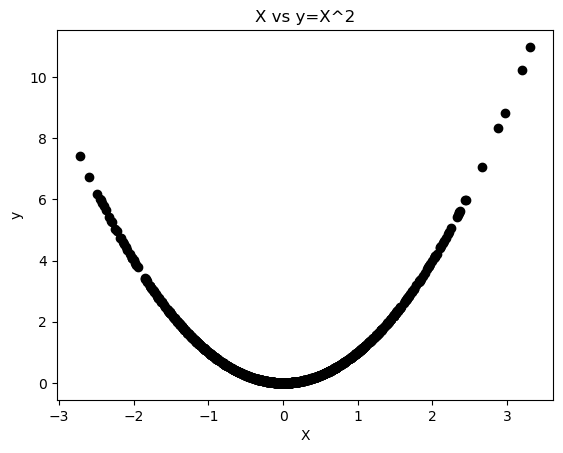

In [19]:
# Creating our normally distributed random X values 
X = np.array(np.random.randn(1000))

# Create another array y = X^2 for our target variable
y = np.array(X**2)

# Visualise this relationship
plt.scatter(X, y,  color='black')
plt.title('X vs y=X^2')
plt.xlabel('X')
plt.ylabel('y')

If we fit a linear model on this, we will not get a good prediction at all as there is no way to fit a straight line to this data that will predict the target in a meaningful way. See the code output below.

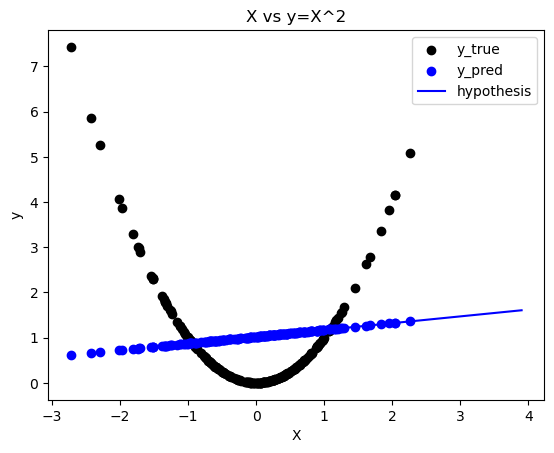

Mean squared error loss: 1.4667
R2 score: -0.0959


In [20]:
# Test/train data points
n_train_points = 800
n_new_points = 200

# Split the data into training/new data
X_train = X[:n_train_points]
X_new = X[n_train_points:n_train_points+n_new_points]

# Split the targets into training/new data
y_train = y[:n_train_points]
y_true = y[n_train_points:n_train_points+n_new_points]

# Create linear regression object
obj = sklearn.linear_model.LinearRegression()

# Train the model using the training sets
obj.fit(X_train.reshape(-1, 1), y_train)

# Make predictions using the testing set
y_pred = obj.predict(X_new.reshape(-1, 1))

# Plot outputs
plt.scatter(X_new, y_true,  color='black', label='y_true')
plt.scatter(X_new, y_pred, color='blue', label='y_pred')
plt.plot(np.r_[0:4:0.1], obj.predict(np.r_[0:4:0.1][:, np.newaxis]), color='blue', label='hypothesis')

plt.xlabel('X')
plt.ylabel('y')
plt.title('X vs y=X^2')
plt.legend()
plt.show()


# The mean squared error loss
print('Mean squared error loss: {:.4f}'.format(sklearn.metrics.mean_squared_error(y_true, y_pred)))
# The R2 score: 1 is perfect prediction
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_true, y_pred)))

In later weeks we will address what can be done to account for nonlinear variable in our model, but for now I just want you all to be aware of the problem.

## **Exercise 7:** Fitting Nonlinear Data

While I will explain to you how we can deal with nonlinear data in a later week, if you have completed all the other tasks you can experiment with the `nonlinearData.csv` file I've uploaded to moodle and see if you can work out yourself how we can account for these features.

In [21]:
##############################################################
# Your code here
##############################################################

# Load .csv and put in dataframe
NLData = pd.read_csv('nonlinearData.csv')
raw_df = pd.DataFrame(data=NLData)

# Shuffle dataset
rng = np.random.default_rng(0)
df = raw_df.iloc[rng.permutation(len(raw_df))].reset_index(drop=True)
df['X2']=df['X']*df['X']
df['X3']=df['X']*df['X']*df['X']
# view data
display(df)
# put into arrays
X = np.array(df[['X', 'X2', 'X3']])
y = np.array(df['Y'])

n_train_points = 15
n_new_points = 6

# Split the data into training/new data
X_train = X[:n_train_points]
X_new = X[n_train_points:n_train_points+n_new_points]

# Display Data
X_train_disp = X_train[:,0]
X_new_disp = X_new[:,0]

# Split the targets into training/new data
y_train = y[:n_train_points]
y_true = y[n_train_points:n_train_points+n_new_points]

# Create linear regression object
obj = sklearn.linear_model.LinearRegression()

# Train the model using the training sets
obj.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = obj.predict(X_new)

# Plot outputs
plt.scatter(X_train_disp, y_train,  color='red', label='training')
plt.scatter(X_new_disp, y_true,  color='black', label='y_true')
plt.scatter(X_new_disp, y_pred, color='blue', label='y_pred')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Nonlinear Data')
plt.legend()
plt.show()


# The mean squared error loss
print('Mean squared error loss: {:.4f}'.format(sklearn.metrics.mean_squared_error(y_true, y_pred)))
# The R2 score: 1 is perfect prediction
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_true, y_pred)))

FileNotFoundError: [Errno 2] No such file or directory: 'nonlinearData.csv'